In [101]:
#Using Goole Colab : Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

In [103]:
pd.options.display.float_format = '{:.2f}'.format

##Problem Statement
```
To predict the final price of each home in Melbourne.
```

In [104]:
 #Feature Description
feat_desc= pd.read_excel('/content/drive/MyDrive/Move to Melbourne/RegularizationDataDictionary.xlsx')
feat_desc

,Feature,Description
0,Rooms,Number of rooms
1,Type,Property type
2,Price,Price in dollars
3,Method,Property status
4,SellerG,Real Estate Agent
5,Distance,Distance from CBD
6,Postcode,Code of the area
7,Bathroom,Number of Bathrooms
8,Car,Number of carspots
9,Landsize,Land Size


### Load the dataset


In [105]:
# Read the dataset and extract the test  and train data separately
df_train=pd.read_csv('/content/drive/MyDrive/Move to Melbourne/train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/Move to Melbourne/test.csv')

# Dropping Ids
train_id = df_train['Id']

df_train.drop(['Id'], axis=1, inplace=True)


In [106]:
# Examine first 5 rows
df_train.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,3,2,995000,1,135,6.30,3143,2,2,0,100.00,1998,26,145.02,5,4836
1,2,0,1080000,1,155,2.00,3066,1,0,0,94.00,1890,31,144.99,2,4553
2,3,0,725000,1,196,17.90,3082,2,2,602,129.00,1980,29,145.07,2,10529
3,4,0,1330000,1,251,8.00,3016,3,2,217,266.00,2003,10,144.88,6,6380
4,3,0,620000,1,221,12.40,3060,1,2,604,190.00,1970,23,144.97,2,5070


In [107]:
# No. of rows and columns
print(df_train.shape)

# Examine the column names
print(df_train.columns)

(4781, 16)
Index(['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [108]:
# Examine no. of non null entries, and column datatype
df_train.info()

#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          4781 non-null   int64  
 1   Type           4781 non-null   int64  
 2   Price          4781 non-null   int64  
 3   Method         4781 non-null   int64  
 4   SellerG        4781 non-null   int64  
 5   Distance       4781 non-null   float64
 6   Postcode       4781 non-null   int64  
 7   Bathroom       4781 non-null   int64  
 8   Car            4781 non-null   int64  
 9   Landsize       4781 non-null   int64  
 10  BuildingArea   4781 non-null   float64
 11  YearBuilt      4781 non-null   int64  
 12  CouncilArea    4781 non-null   int64  
 13  Longtitude     4781 non-null   float64
 14  Regionname     4781 non-null   int64  
 15  Propertycount  4781 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 597.8 KB


In [109]:
#Calculate Summary Statistics
df_train.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00,4781.00
mean,2.96,0.54,1080936.44,1.44,131.49,10.05,3103.31,1.59,1.61,480.50,143.16,1964.34,13.61,144.99,3.77,7477.20
std,0.96,0.84,675709.81,1.14,77.20,5.87,87.54,0.71,0.95,899.49,91.44,38.06,10.39,0.10,2.02,4395.75
min,1.00,0.00,145000.00,0.00,2.00,0.00,3000.00,1.00,0.00,0.00,0.00,1196.00,-1.00,144.55,0.00,389.00
25%,2.00,0.00,630000.00,1.00,73.00,6.10,3044.00,1.00,1.00,168.00,94.00,1940.00,2.00,144.93,2.00,4380.00
50%,3.00,0.00,900000.00,1.00,135.00,9.20,3083.00,1.00,2.00,411.00,126.00,1970.00,15.00,145.00,5.00,6567.00
75%,4.00,1.00,1337000.00,1.00,194.00,13.00,3147.00,2.00,2.00,638.00,172.00,2000.00,23.00,145.06,5.00,10331.00
max,8.00,2.00,9000000.00,4.00,267.00,47.30,3977.00,8.00,10.00,37000.00,3112.00,2018.00,32.00,145.45,7.00,21650.00


### Visualize the data

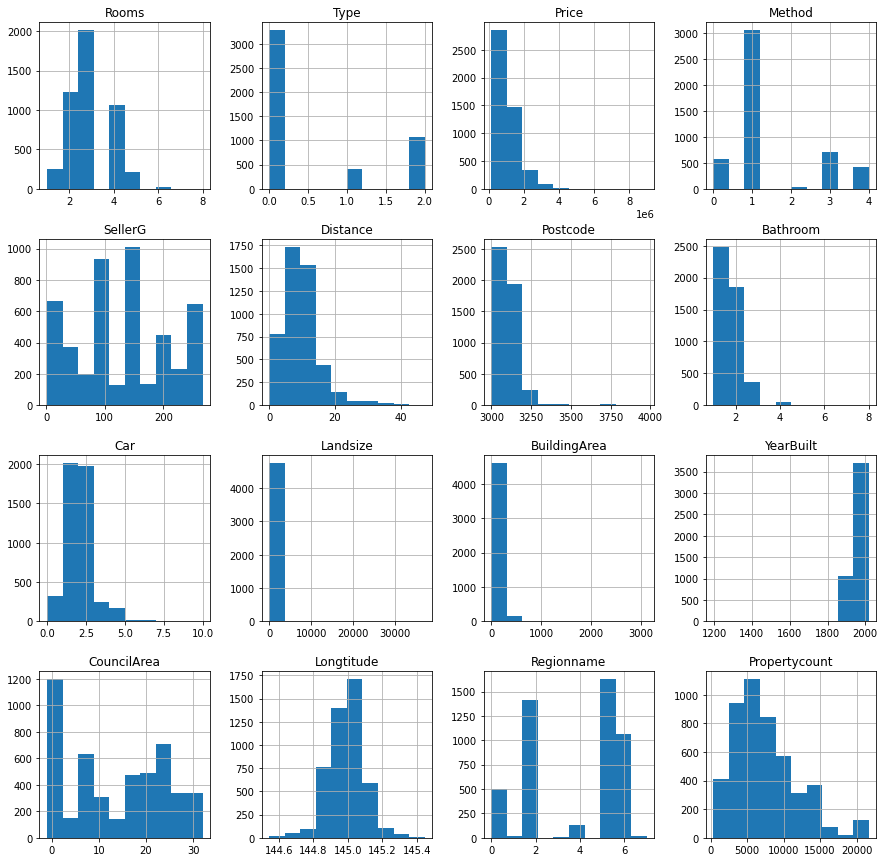

In [110]:
# Data distribution

data_distribution = df_train.hist(figsize=(15,15))
plt.show();

# Obs:
#Right Skewed - Landsize, BuildingArea,  Target Variable - Price

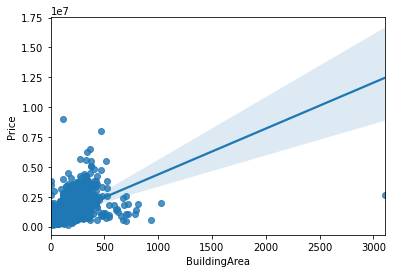

In [111]:
#Price vs BuildingArea
sns.regplot(x="BuildingArea", y="Price", data=df_train) #order=2 for poly reg

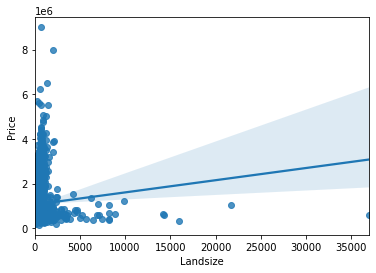

In [112]:
#Price vs Landsize 
sns.regplot(x="Landsize", y="Price", data=df_train)

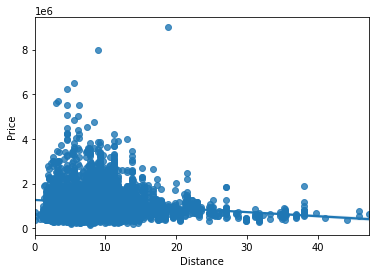

In [113]:
#Price vs Distance
sns.regplot(x="Distance", y="Price", data=df_train) #order=2 for poly reg

In [114]:
df_train['Price']=np.log1p(df_train['Price'])


df_train['BuildingArea']=np.log1p(df_train['BuildingArea'])
df_train['Landsize']=np.log1p(df_train['Landsize'])


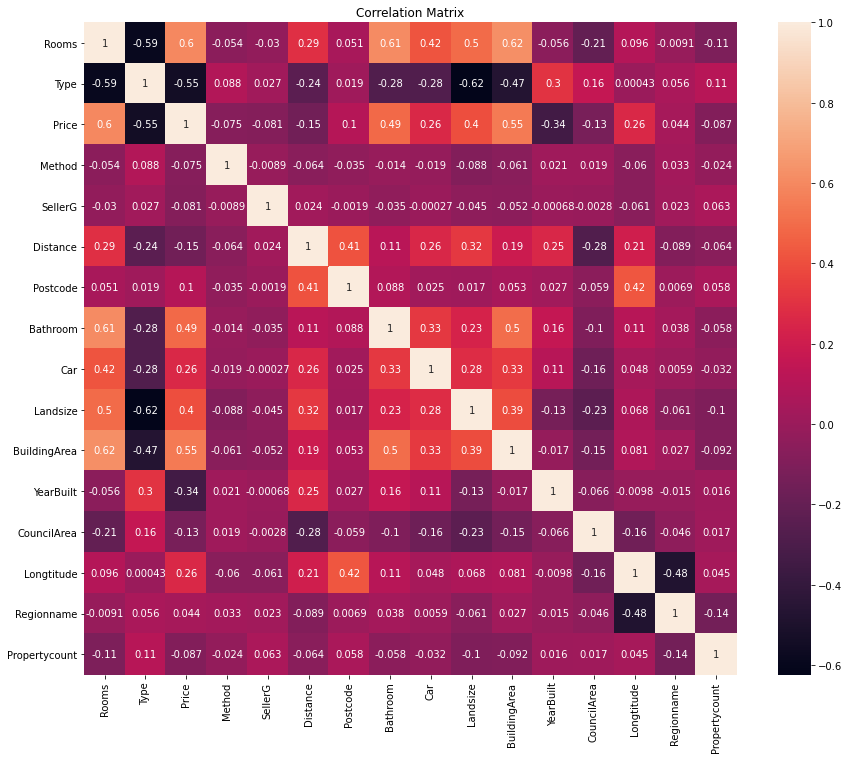

In [115]:
# correlation
corr = df_train.corr()

plt.figure(figsize=(15,12))
plt.title('Correlation Matrix')

sns.heatmap(corr,square=True,annot = True)
plt.show();

## Model building


In [116]:
#Splitting training set
X=df_train[['Rooms', 'Type', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Longtitude']]
y=df_train['Price']

print(X.head())
print(y.head())


#we split 75% of the data to training set while 25% of the data to validation 
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

#X_train, X_valid shape
print(X_train.shape)
print(X_valid.shape)


   Rooms  Type  Distance  ...  YearBuilt  CouncilArea  Longtitude
0      3     2      6.30  ...       1998           26      145.02
1      2     0      2.00  ...       1890           31      144.99
2      3     0     17.90  ...       1980           29      145.07
3      4     0      8.00  ...       2003           10      144.88
4      3     0     12.40  ...       1970           23      144.97

[5 rows x 11 columns]
0   13.81
1   13.89
2   13.49
3   14.10
4   13.34
Name: Price, dtype: float64
(3585, 11)
(1196, 11)


In [117]:
# Fitting Polynomial Feature to the dataset 

poly = PolynomialFeatures(degree = 3) 
X_train_poly = poly.fit_transform(X_train) 
X_valid_poly=poly.transform(X_valid)

In [118]:
# regularization parameters for grid search
ridge_lambdas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60]
lasso_lambdas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1]

In [119]:
# Ridge model
ridge_model=Ridge()

# grid search on lasso and ridge
ridge_grid=GridSearchCV(estimator=ridge_model,param_grid=dict(alpha=ridge_lambdas))
ridge_grid.fit(X_train_poly,y_train)

# make predictions 
ridge_pred=ridge_grid.predict(X_valid_poly)

Error=np.sqrt(mean_squared_error(y_valid,ridge_pred))
print(Error)

#R-squared calculation Ridge
rsquared = r2_score(y_valid,ridge_pred)
print(rsquared)

0.2352755624145978
0.8163286388953713


In [120]:

# lasso model
lasso_model=Lasso()

# grid search on lasso 
lasso_grid=GridSearchCV(estimator=lasso_model,param_grid=dict(alpha=lasso_lambdas))
lasso_grid.fit(X_train_poly,y_train)

# make predictions 
lasso_pred=lasso_grid.predict(X_valid_poly)

Error=np.sqrt(mean_squared_error(y_valid,lasso_pred))
print(Error)

#R-squared calculation Lasso
rsquared = r2_score(y_valid,lasso_pred)
print(rsquared)

0.23709178810818768
0.81348196649228


In [121]:
#LR

model=LinearRegression()
model.fit(X_train_poly, y_train)
pred=model.predict(X_valid_poly)

Error=np.sqrt(mean_squared_error(y_valid,pred))
print(Error)

# R-squared calculation LR
rsquared = r2_score(y_valid,pred)
print(rsquared)

0.25145278967775786
0.7902023012430691


### Prediction on the test data and creating the sample submission file.


In [122]:
#the Id column in a separate variable : test_id
test_id = df_test['Id']
df_test.drop(['Id'], axis=1, inplace=True) 

#Test data shape and columns names
print(df_test.shape)
print(df_test.columns)

df_test['BuildingArea']=np.log1p(df_test['BuildingArea'])
df_test['Landsize']=np.log1p(df_test['Landsize'])


(2049, 15)
Index(['Rooms', 'Type', 'Method', 'SellerG', 'Distance', 'Postcode',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [123]:
#Features selected from test data
#X_test = df_test
X_test=df_test[['Rooms', 'Type', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Longtitude']]
X_test_poly = poly.transform(X_test) 

#make prediction : Value (M)
ytest_pred=ridge_grid.predict(X_test_poly)

#Making df for submission np.expm1()
subm=pd.DataFrame({"Id": test_id, "Price": np.expm1(ytest_pred)})
print(subm.head())


     Id      Price
0  5067  817207.64
1  3722  889735.60
2  6820 1697614.58
3  3103  552097.97
4  2820  961944.83


In [124]:
# To CSV for submission
#subm.to_csv('submission_1.csv',index=False)

#from google.colab import files
#files.download('submission_1.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>